# Sphere plots

In [1]:
# Imports
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
import matplotlib.patches as mpatches
from IPython.display import Image
from numpy.linalg import lstsq

Latex Macros
$\newcommand{\AA}{\unicode{xC5}}$

In [2]:
base_dir = "/home/oge1/lammps/sapphire/analysis/results/finalResults/avg/"
mrad = genfromtxt(base_dir+"monoEdge.txt")[:,:-1]
brad = genfromtxt(base_dir+"bulkEdge.txt")[:,:-1]
mnum = genfromtxt(base_dir+"nMono.txt")[:,:-1]

In [3]:
shape(brad)

(1000, 6)

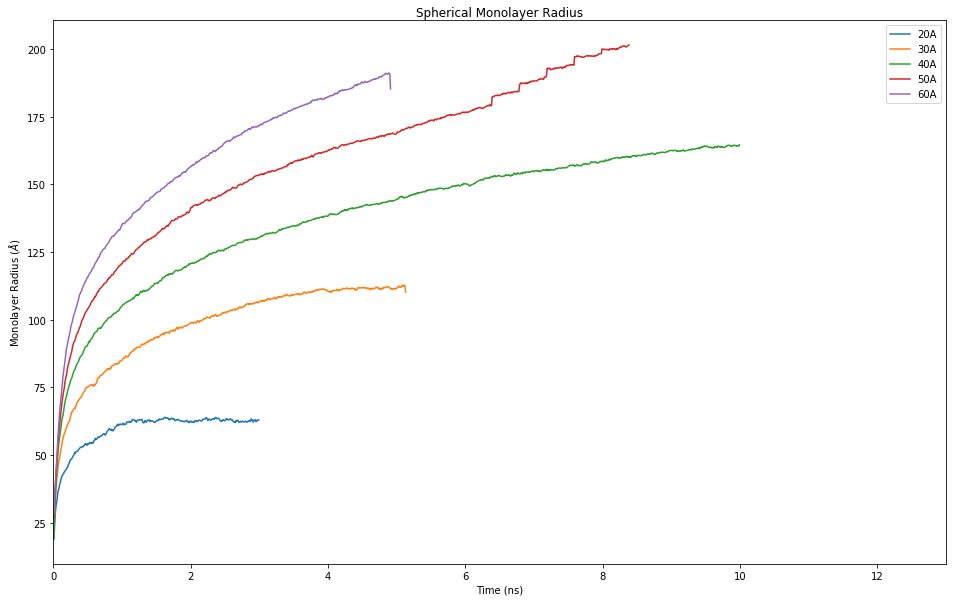

In [4]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = t_all > 0
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    plot(tt,mr,label=lbl)
title('Spherical Monolayer Radius')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius ($\AA$)')
#ylim(0,400) 
xlim(0,13)
legend(loc='best')
savefig('results/mr_30A_5ns.png')

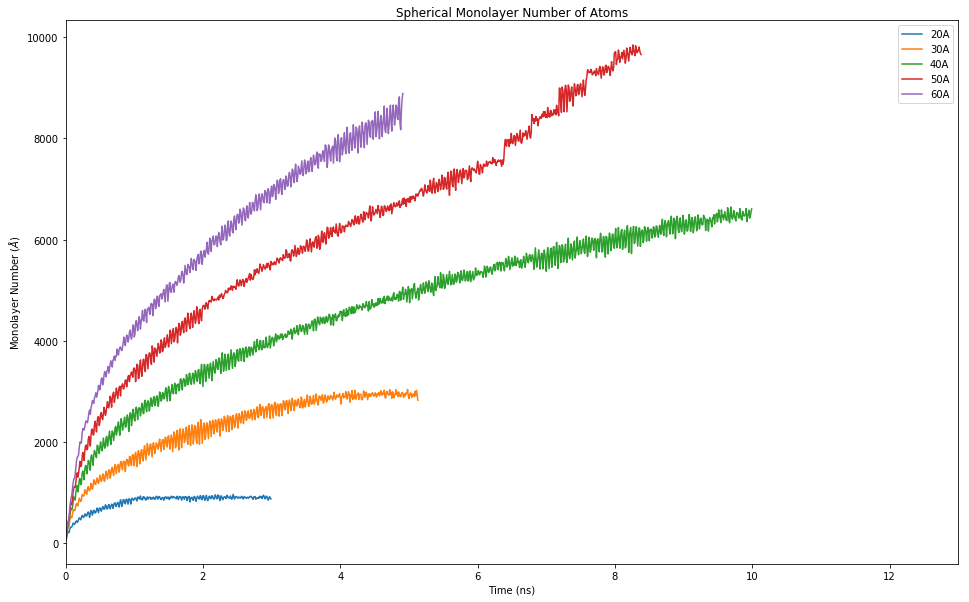

In [5]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mnum.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mnum[:,0]/1e6
    whichvals = t_all > 0
    tt = t_all[whichvals]
    mr = mnum[:,i][whichvals]
    plot(tt,mr,label=lbl)
title('Spherical Monolayer Number of Atoms')
xlabel('Time (ns)')
ylabel(r'Monolayer Number ($\AA$)')
#ylim(0,400) 
xlim(0,13)
legend(loc='best')
savefig('results/mn_30A_5ns.png')

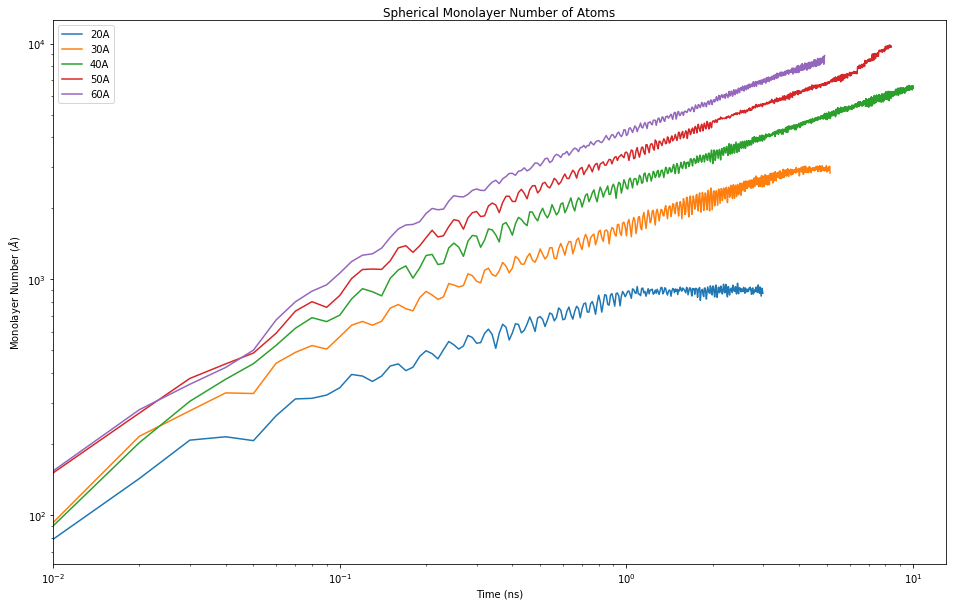

In [6]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mnum.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mnum[:,0]/1e6
    whichvals = t_all > 0
    tt = t_all[whichvals]
    mr = mnum[:,i][whichvals]
    loglog(tt,mr,label=lbl)
title('Spherical Monolayer Number of Atoms')
xlabel('Time (ns)')
ylabel(r'Monolayer Number ($\AA$)')
#ylim(0,400) 
xlim(0,13)
legend(loc='best')
savefig('results/logmn_30A_5ns.png')

In [42]:
# Time for all droplet fitting to begin (ns)
starttime = exp(-1)

# Times at which droplets have ceased spreading (ns)
#endtimes = [1.5,4,12,12,12]
endtimes = [12,12,12,12,12]

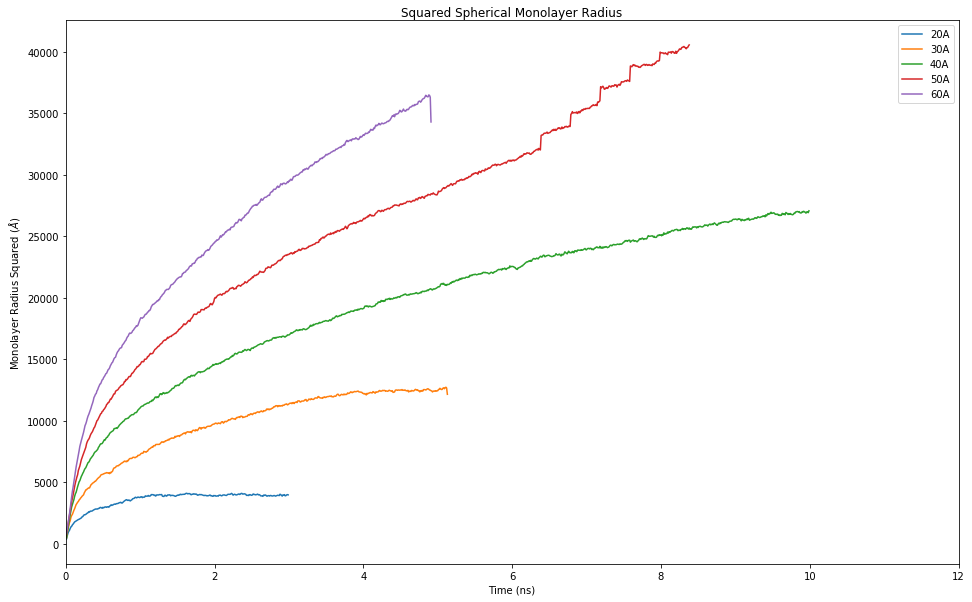

In [43]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = t_all > 0
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    plot(tt,mr**2,label=lbl)
title('Squared Spherical Monolayer Radius')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius Squared ($\AA$)')
#ylim(0,400) 
xlim(0,12)
legend(loc='best')

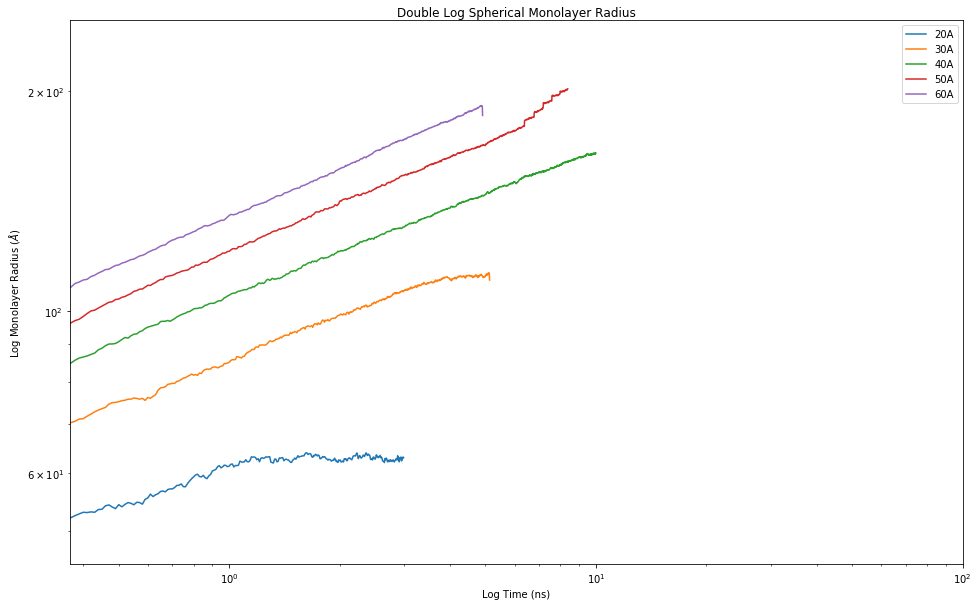

In [44]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = t_all > 0
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    #plot(log(tt),log(mr),
    #    label=lbl)
    loglog(tt,mr,label=lbl)
title('Double Log Spherical Monolayer Radius')
xlabel('Log Time (ns)')
ylabel(r'Log Monolayer Radius ($\AA$)')
#ylim(0,400) 
#xlim(starttime,log(100))
#ylim(4,5.25)
xlim(starttime,100)
ylim(45,250)
legend(loc='best')
savefig('results/logmr_30A_6ns.png')

In [45]:
# Linear least squares
def lin_ls(xx,yy):
    # Set up system
    A = array([[sum(xx**2),sum(xx)],[sum(xx),len(xx)]])
    b = array([sum(xx*yy),sum(yy)])
    
    # Solve system using numpy.linalg.lstsq
    mm,bb = lstsq(A,b)[0]
    
    return mm,bb

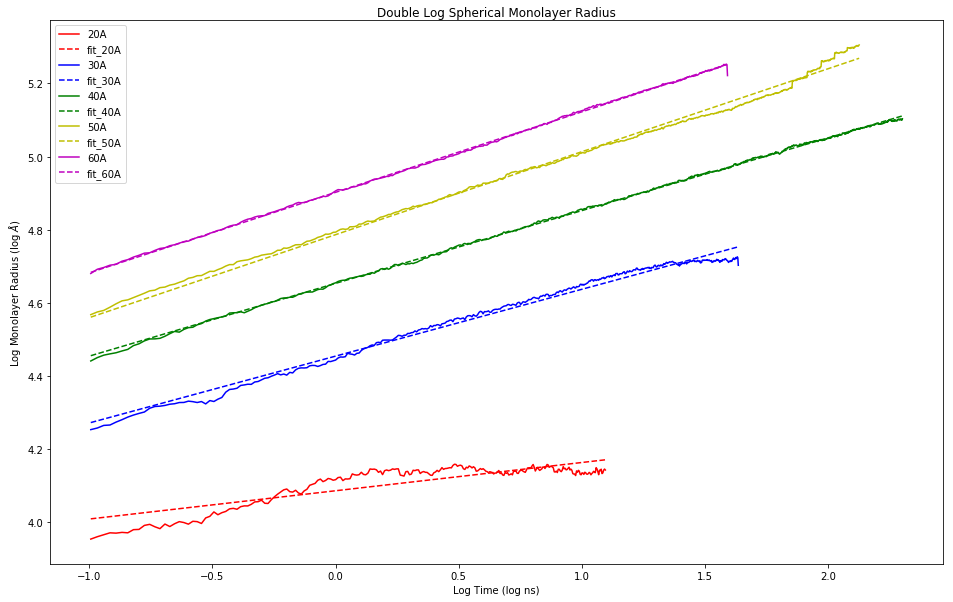

In [46]:
# Least squares fit of above plot - double log plot of monolayer radius
def line_func(x,m,b):
    return m*x + b

# Create figure
figure(figsize=[16,10])

# Initial guess
guess = [0,0]

colors = ['r','b','g','y','m']

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and.reduce([t_all<endtimes[i-1],t_all > starttime,isfinite(mrad[:,i])])
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    
    # least sqares
    mm,bb = lin_ls(log(tt),log(mr))
    
    # Plot data
    plot(log(tt),log(mr),
        label=lbl,color=colors[i-1])
    
    # Plot fit
    plot(log(tt),mm*log(tt)+bb,'--',label='fit_{}'.format(lbl),color=colors[i-1])
title('Double Log Spherical Monolayer Radius')
xlabel('Log Time (log ns)')
ylabel(r'Log Monolayer Radius (log $\AA$)')
#ylim(0,400) 
#xlim(0,10)
legend(loc='best')

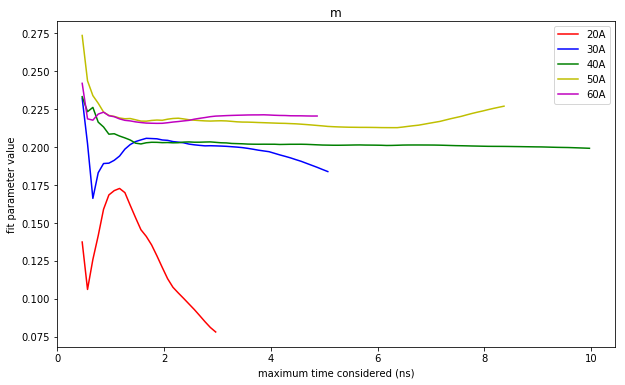

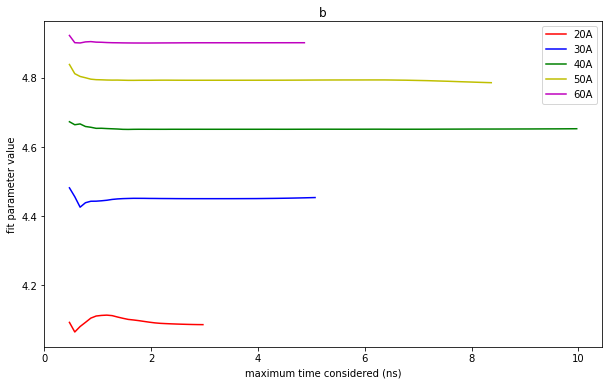

In [47]:
# Plot coefficients (b,m) as functions of the maximum time considered.
# i.e., b(t1) = lstsq(t \in [t0,t1])

# Create figure
fig1 = figure(figsize=[10,6])
ax1 = gca()
fig2 = figure(figsize=[10,6])
ax2 = gca()

# Initial guess
guess = [0,0]

colors = ['r','b','g','y','m']

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    # Final times to consider
    trange = arange(starttime,endtimes[i-1],1e-1)[1:]
    
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    m_list = zeros_like(trange)
    b_list = zeros_like(trange)
    m_list[:] = nan
    b_list[:] = nan
    for k, tmax in enumerate(trange):
        
        # Only consider after which there is still data
        if(mrad[:,i][logical_and(t_all>=tmax,isfinite(mrad[:,i]))].size > 0):
            whichvals = logical_and.reduce([t_all<tmax,t_all > starttime,isfinite(mrad[:,i])])
            tt = t_all[whichvals]
            mr = mrad[:,i][whichvals]

            # least sqares
            m_list[k],b_list[k] = lin_ls(log(tt),log(mr))
        else:
            break

    
    # Plot m values
    ax1.plot(trange,m_list,'-',label='{}'.format(lbl),color=colors[i-1])
    # Plot b values
    ax2.plot(trange,b_list,'-',label='{}'.format(lbl),color=colors[i-1])
#title('Double Log Spherical Monolayer Radius')
#xlabel('Log Time (log ns)')
#ylabel(r'Log Monolayer Radius (log $\AA$)')
#ylim(0,400) 
#xlim(0,10)
ax1.set_title('m')
ax2.set_title('b')
ax1.set_xlabel('maximum time considered (ns)')
ax2.set_xlabel('maximum time considered (ns)')
ax1.set_ylabel('fit parameter value')
ax2.set_ylabel('fit parameter value')
fig1.savefig('results/m_plot.png')
ax1.legend(loc='best')
ax2.legend(loc='best')
fig2.savefig('results/b_plot.png')

In [48]:
ls

comparison.ipynb                   Interpolation.ipynb
Cylinder.ipynb                     movie_50A_vfield.o342203
Cylindrical Monolayer Model.ipynb  results/
Droplet Model.ipynb                Spherical Monolayer Model.ipynb
flowfield.py                       Untitled.ipynb


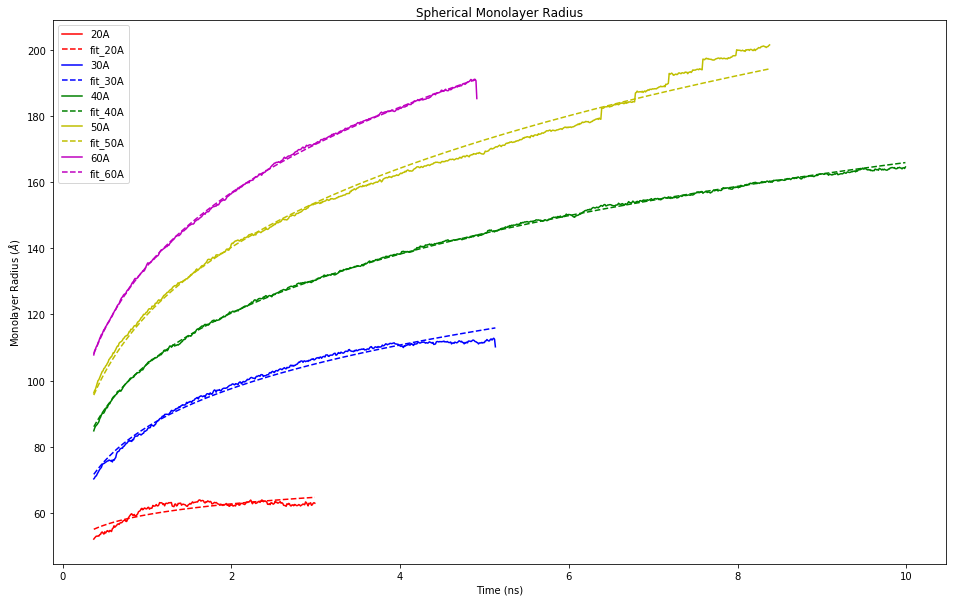

In [49]:
# Create figure
figure(figsize=[16,10])

# Initial guess
guess = [0,0]

colors = ['r','b','g','y','m']

# Matrix of least squares coefficients
ls_coefs = zeros([5,2])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and.reduce([t_all<endtimes[i-1],t_all > starttime,isfinite(mrad[:,i])])
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    
    # least sqares
    mm,bb = lin_ls(log(tt),log(mr))
    
    # Save coefficients
    ls_coefs[i-1,:] = mm,bb
    
    # Plot data
    plot(tt,mr,
        label=lbl,color=colors[i-1])
    
    # Plot fit
    plot(tt,exp(bb)*tt**mm,'--',label='fit_{}'.format(lbl),color=colors[i-1])
title('Spherical Monolayer Radius')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius ($\AA$)')
#ylim(0,400) 
#xlim(0,10)
legend(loc='best')

In [50]:
# Base radii
R = linspace(20,60,5)

In [51]:
# Scaling coefficients (Ignore 20A)
start = 1
sc_m_m,sc_m_b = lin_ls(log(R[start:]),log(ls_coefs[start:,0]))
sc_b_m,sc_b_b = lin_ls(log(R[start:]),log(ls_coefs[start:,1]))

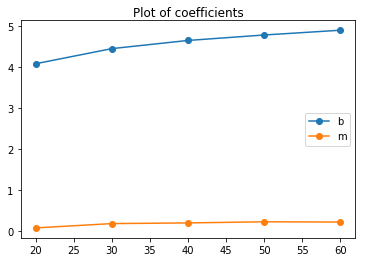

In [52]:
plot(R,ls_coefs[:,1],'o-',label='b')
plot(R,ls_coefs[:,0],'o-',label='m')
title('Plot of coefficients')
legend()

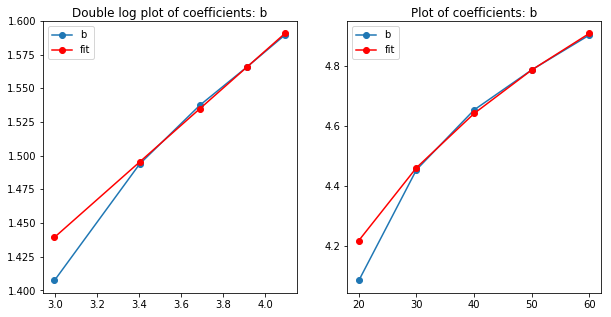

In [53]:
figure(figsize=[10,5])

subplot(1,2,1)
plot(log(R),log(ls_coefs[:,1]),'o-',label='b')
plot(log(R),sc_b_m*log(R)+sc_b_b,'or-',label='fit')
title('Double log plot of coefficients: b')
legend()

subplot(1,2,2)
plot(R,ls_coefs[:,1],'o-',label='b')
plot(R,exp(sc_b_b)*R**sc_b_m,'or-',label='fit')
title('Plot of coefficients: b')
legend()

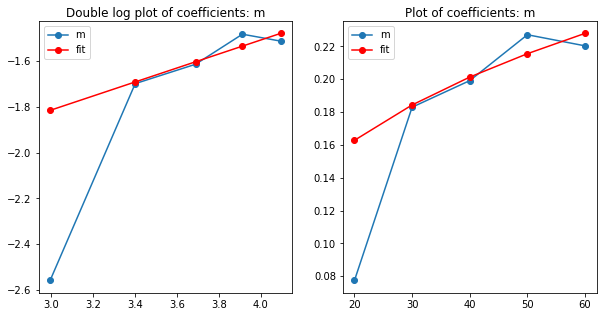

In [54]:
figure(figsize=[10,5])

subplot(1,2,1)
plot(log(R),log(ls_coefs[:,0]),'o-',label='m')
plot(log(R),sc_m_m*log(R)+sc_m_b,'or-',label='fit')
title('Double log plot of coefficients: m')
legend()

subplot(1,2,2)
plot(R,ls_coefs[:,0],'o-',label='m')
plot(R,exp(sc_m_b)*R**sc_m_m,'or-',label='fit')
title('Plot of coefficients: m')
legend()

In [55]:
ls_coefs

array([[ 0.07736524,  4.08503011],
       [ 0.18297394,  4.45359708],
       [ 0.19917533,  4.65279439],
       [ 0.22713889,  4.78608053],
       [ 0.22036385,  4.90202605]])

20A: r_m = 67.89646716457885 t ^ 0.16279006264319762
30A: r_m = 86.52246226626757 t ^ 0.1843372206614245
40A: r_m = 103.6279624944496 t ^ 0.20133352854011666
50A: r_m = 119.79099288855672 t ^ 0.21558883918663815
60A: r_m = 135.3045497654357 t ^ 0.22798236252533013


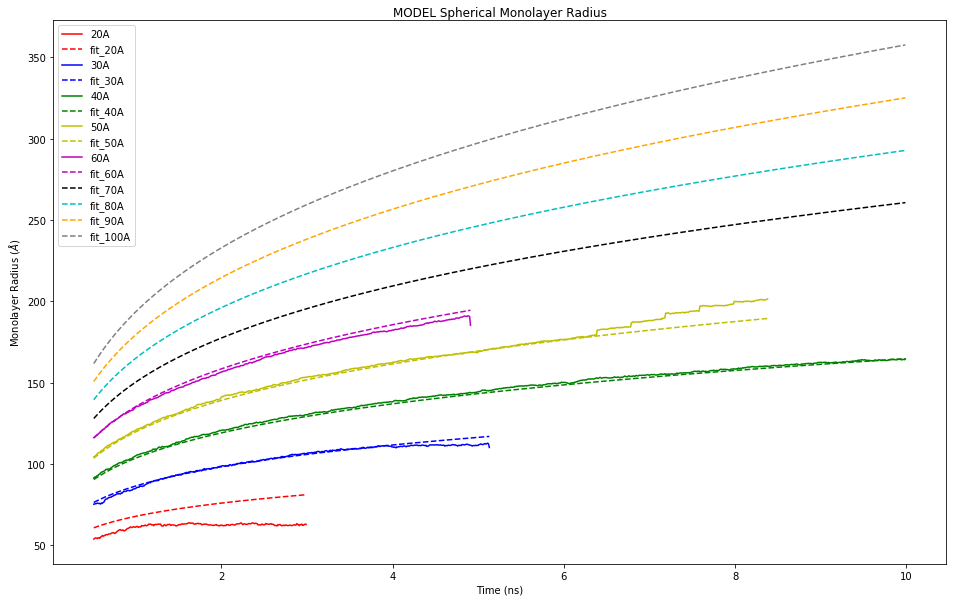

In [56]:
# Test model

# Create figure
figure(figsize=[16,10])

colors = ['r','b','g','y','m','k','c','orange','grey']

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and(t_all > 5e-1,isfinite(mrad[:,i]))
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    
    # Scaling coefficients (non-log)
    #mm = sc_m_m*R[i-1] + sc_m_b
    #bb = sc_b_m*R[i-1] + sc_b_b
    
    # Scaling coefficients (log)
    mm = exp(sc_m_b)*R[i-1]**sc_m_m
    bb = exp(sc_b_b)*R[i-1]**sc_b_m
    
    # Model
    yy = exp(bb)*tt**mm
    print('{}0A: r_m = {} t ^ {}'.format(i+1,exp(bb),mm))
    
    # Plot data
    plot(tt,mr,
        label=lbl,color=colors[i-1])
    
    # Plot model
    plot(tt,yy,'--',label='fit_{}'.format(lbl),color=colors[i-1])
    
# Include 70A - 100A model
for i in range(6,10):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    tt = t_all[t_all > 5e-1]
    
    # Scaling coefficients (non-log)
    #mm = sc_m_m*R[i-1] + sc_m_b
    #bb = sc_b_m*R[i-1] + sc_b_b
    
    # Base radius
    RR = 10*(i+1)
    # Scaling coefficients (log)
    mm = exp(sc_m_b)*RR**sc_m_m
    bb = exp(sc_b_b)*RR**sc_b_m
    
    # Model
    yy = exp(bb)*tt**mm
    
    # Plot model
    plot(tt,yy,'--',label='fit_{}A'.format(RR),color=colors[i-1])

title('MODEL Spherical Monolayer Radius')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius ($\AA$)')
#ylim(0,400) 
#xlim(0,10)
legend(loc='best')

In [57]:
starttime

0.36787944117144233

In [58]:
brad[:,3][mrad[:,0]/1e6>starttime][0]

66.545955000000006

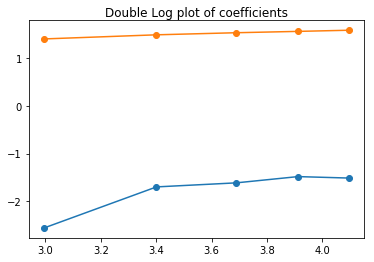

In [59]:
plot(log(R),log(ls_coefs[:,0]),'o-',label='m')
plot(log(R),log(ls_coefs[:,1]),'o-',label='b')
title('Double Log plot of coefficients')

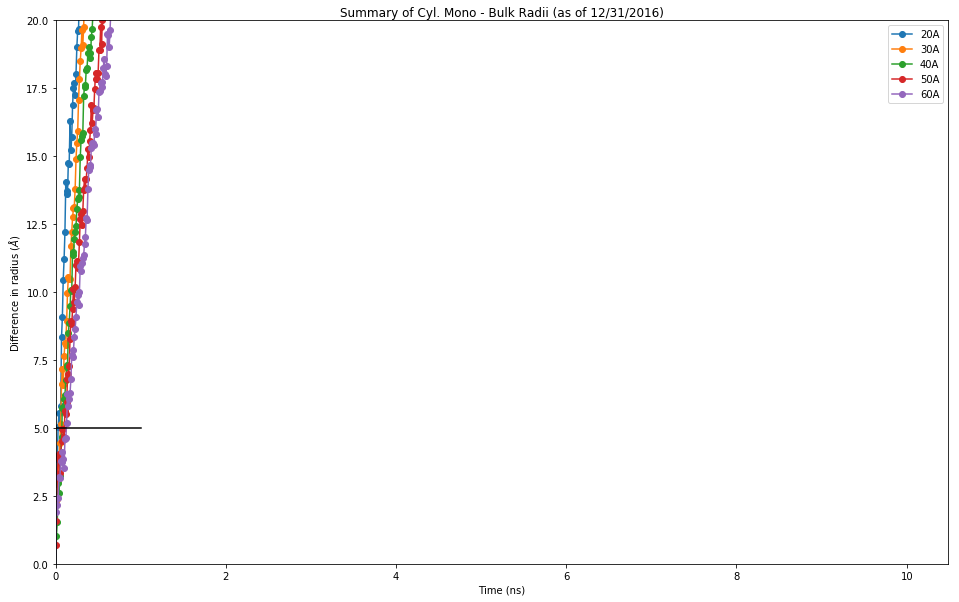

In [60]:
## Monolayer - Bulk Radius difference ##

# Create figure
figure(figsize=[16,10])

# Plot old Sub951By50 values
for i in range(1,brad.shape[1]):
    whichvals = logical_and(brad[:,i]<300,brad[:,i]>10)
    lbl = '{}0A'.format(i+1)
    plot(brad[:,0][whichvals]/1e6,mrad[:,i][whichvals]-brad[:,i][whichvals],'o-',
        label=lbl)

# Disclaimer
disclaimer = '''\
***************************
* Some extraneous values  *
* have been intentionally *
* removed from Old sims   *
***************************'''
#text(.2,60,disclaimer,ha='left',va='top',
    #family='monospace')

# Plot features
title('Summary of Cyl. Mono - Bulk Radii (as of 12/31/2016)')
xlabel('Time (ns)')
ylabel(r'Difference in radius ($\AA$)')
plot([0,1],[5,5],'k-')
ylim(0,20) 
xlim(0,)
legend(loc='best')
savefig('results/sph_diff.png')

In [63]:
# # Plot bulk and monolayer radius together for Sub951By50 Cyl50A
# 
# figure(figsize=[16,10])
# 
# # Cyl50A
# i = 5
# 
# # bulk
# #b_whichvals = logical_and(old_brad[:,i]<300,old_brad[:,i]>10)
# b_lbl = 'Sub951By50 Cyl{}0A Bulk'.format(i)
# plot(old_brad[:,0][whichvals]/1e6,old_brad[:,i][whichvals],
#     label=b_lbl)
# 
# # mono
# #m_whichvals = logical_and(old_mrad[:,i]<300,old_mrad[:,i]>10)
# m_lml = 'Sub951By50 Cyl{}0A Mono'.format(i)
# plot(old_mrad[:,0][whichvals]/1e6,old_mrad[:,i][whichvals],
#     label=m_lml)
# 
# legend()
# ylim(0,250)
# xlim(0,10)

IndentationError: unexpected indent (<ipython-input-63-eafc0a0699c4>, line 12)